General Information

Download Libraries and Data

In [95]:
from __future__ import print_function, division
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline
import category_encoders as ce
from future.utils import iteritems
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from dateutil import parser

In [96]:
df = pd.read_csv('obama-white-house.csv')

Data Overview

In [97]:
df.head(2)

number          name  \
0  44      Barack Obama   
1  44      Barack Obama   

                                                                                                             image  \
0  https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Obama_portrait_crop.jpg/165px-Obama_portrait_crop.jpg   
1  https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Obama_portrait_crop.jpg/165px-Obama_portrait_crop.jpg   

  previous_office                                            presidency_url  \
0  U.S. Senator    https://en.wikipedia.org/wiki/Presidency_of_Barack_Obama   
1  U.S. Senator    https://en.wikipedia.org/wiki/Presidency_of_Barack_Obama   

  party_affiliation           start_date             end_date  \
0  Democratic        2009-01-20 00:00:00  2017-01-20 00:00:00   
1  Democratic        2009-01-20 00:00:00  2017-01-20 00:00:00   

        document_type_name                     document_types_slug  \
0  Statements and Releases  /briefing-room/statements-and-releases   
1  Statements and Releases  /briefing-room/statements-and-releases   

                                                 title  \
0  FACT SHEET:  United States – Argentina Relationship   
1  FACT SHEET: U.S.-China Economic Relations             

                                                                                                                            url  \
0  https://obamawhitehouse.archives.gov/the-press-office/2016/03/23/fact-sheet-united-states-%E2%80%93-argentina-relationship-0   
1  https://obamawhitehouse.archives.gov/the-press-office/2015/09/25/fact-sheet-us-china-economic-relations                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21632 entries, 0 to 21631
Data columns (total 14 columns):
number                 21632 non-null int64
name                   21632 non-null object
image                  21632 non-null object
previous_office        21632 non-null object
presidency_url         21632 non-null object
party_affiliation      21632 non-null object
start_date             21632 non-null object
end_date               21632 non-null object
document_type_name     21632 non-null object
document_types_slug    21632 non-null object
title                  21632 non-null object
url                    21632 non-null object
content                20317 non-null object
document_date          21632 non-null object
dtypes: int64(1), object(13)
memory usage: 2.3+ MB


In [99]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
number,21632.0,44.0,0.0,44.0,44.0,44.0,44.0,44.0


In [100]:
df.describe(include=['O']).transpose()

,count,unique,top,freq
name,21632,1,Barack Obama,21632
image,21632,1,https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Obama_portrait_crop.jpg/165px-Obama_portrait_crop.jpg,21632
previous_office,21632,1,U.S. Senator,21632
presidency_url,21632,1,https://en.wikipedia.org/wiki/Presidency_of_Barack_Obama,21632
party_affiliation,21632,1,Democratic,21632
start_date,21632,1,2009-01-20 00:00:00,21632
end_date,21632,1,2017-01-20 00:00:00,21632
document_type_name,21632,9,Statements and Releases,11732
document_types_slug,21632,9,/briefing-room/statements-and-releases,11732
title,21632,18616,President Obama Announces More Key Administration Posts,395


In [101]:
df = df.drop(['name','image', 'previous_office', 'presidency_url', 'party_affiliation'
             ,'start_date', 'end_date'],axis=1)

In [102]:
pp.ProfileReport(df)

Number of variables,7
Number of observations,21632
Total Missing (%),0.9%
Total size in memory,1.2 MiB
Average record size in memory,56.0 B
Numeric,0
Categorical,5
Boolean,0
Date,0
Text (Unique),1
Rejected,1


In [103]:
df = df.drop(['document_types_slug', 'number'],axis=1)

Sentiment Analysis

In [104]:
df['title_sentiment'] = df.title.map(lambda text: TextBlob(text).sentiment.polarity)

In [105]:
pd.set_option('display.max_colwidth', -1)

In [106]:
df.nlargest(5, 'title_sentiment')[['title_sentiment', 'title']]

,title_sentiment,title
879,1.0,Weekly Address: Representing the Best of America in the Summer Olympics
92,0.8,Presidential Memorandum -- America's Great Outdoors
422,0.8,Presidential Memorandum -- Proposed Amendment to the 1958 Agreement Between the Government of the United States of America and the Government of the United Kingdom of Great Britain and Northern Ireland
571,0.8,Presidential Memorandum -- Treaty Between the Government of the United States of America and the Government of the United Kingdom of Great Britain and Northern Ireland Concerning Defense Trade Cooperation
897,0.8,Weekly Address: Happy Mother’s Day From President Obama


In [107]:
df.nsmallest(5, 'title_sentiment')[['title_sentiment', 'title']]

,title_sentiment,title
755,-0.8,Presidential Memorandum--Closure of Dentention Facilities at the Guantanamo Bay Naval Base
2501,-0.8,"Press Gaggle by Press Secretary Josh Earnest en route Joint Base Andrews, 1/14/2016"
2520,-0.8,Statement by NSC Spokesperson Ned Price on Updates to U.S. Government Efforts to Counter Violent Extremism
2871,-0.8,Leaders’ Summit on Countering ISIL and Violent Extremism
2905,-0.8,FACT SHEET: Leaders’ Summit to Counter ISIL and Violent Extremism


In [133]:
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


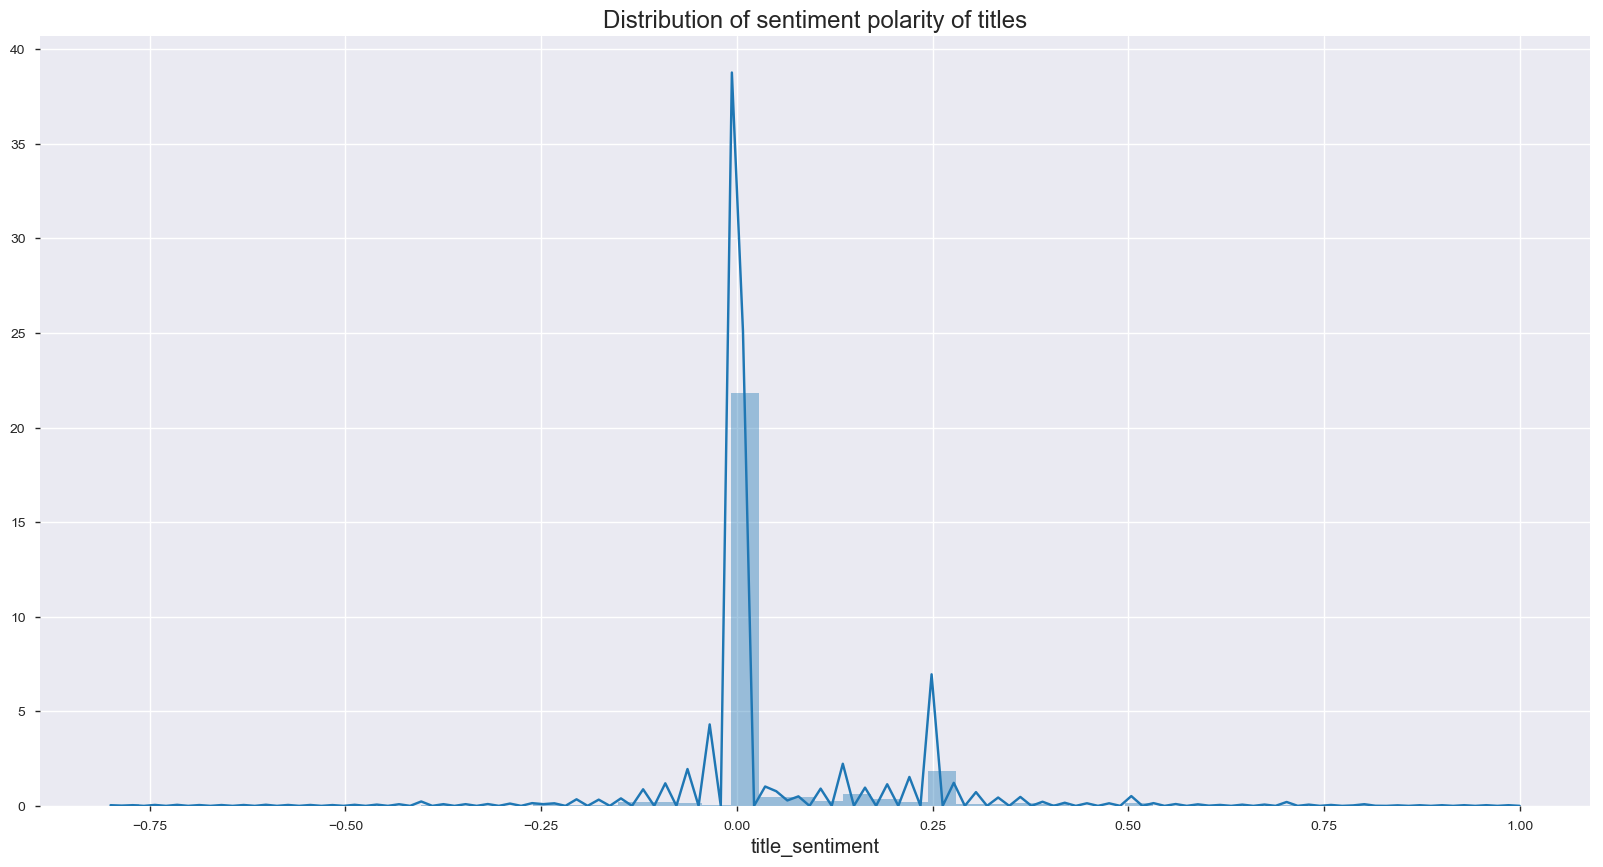

In [109]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['axes.labelsize'] = 'x-large'
sns.distplot(df.title_sentiment);
plt.title("Distribution of sentiment polarity of titles");

In [110]:
neutral_title = df[df['title_sentiment'] == 0][['title_sentiment', 'title']]
neutral_title.sample(5)

,title_sentiment,title
82,0.0,WEEKLY ADDRESS: Renewing America's Global Leadership
17186,0.0,"Press Briefing by Press Secretary Josh Earnest, 1/17/17"
2778,0.0,Readout of the President’s Phone Call with Prime Minister Haidar Al-Abadi of Iraq
17517,0.0,"Press Briefing By Press Secretary Josh Earnest, 6/29/2015"
13160,0.0,Vice President Biden hosts conference calls with governors and local officials to discuss recovery act implementation 04-07-09


In [111]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [112]:
Slighty_Postive_Sentiment = df[df['title_sentiment'] == .25]

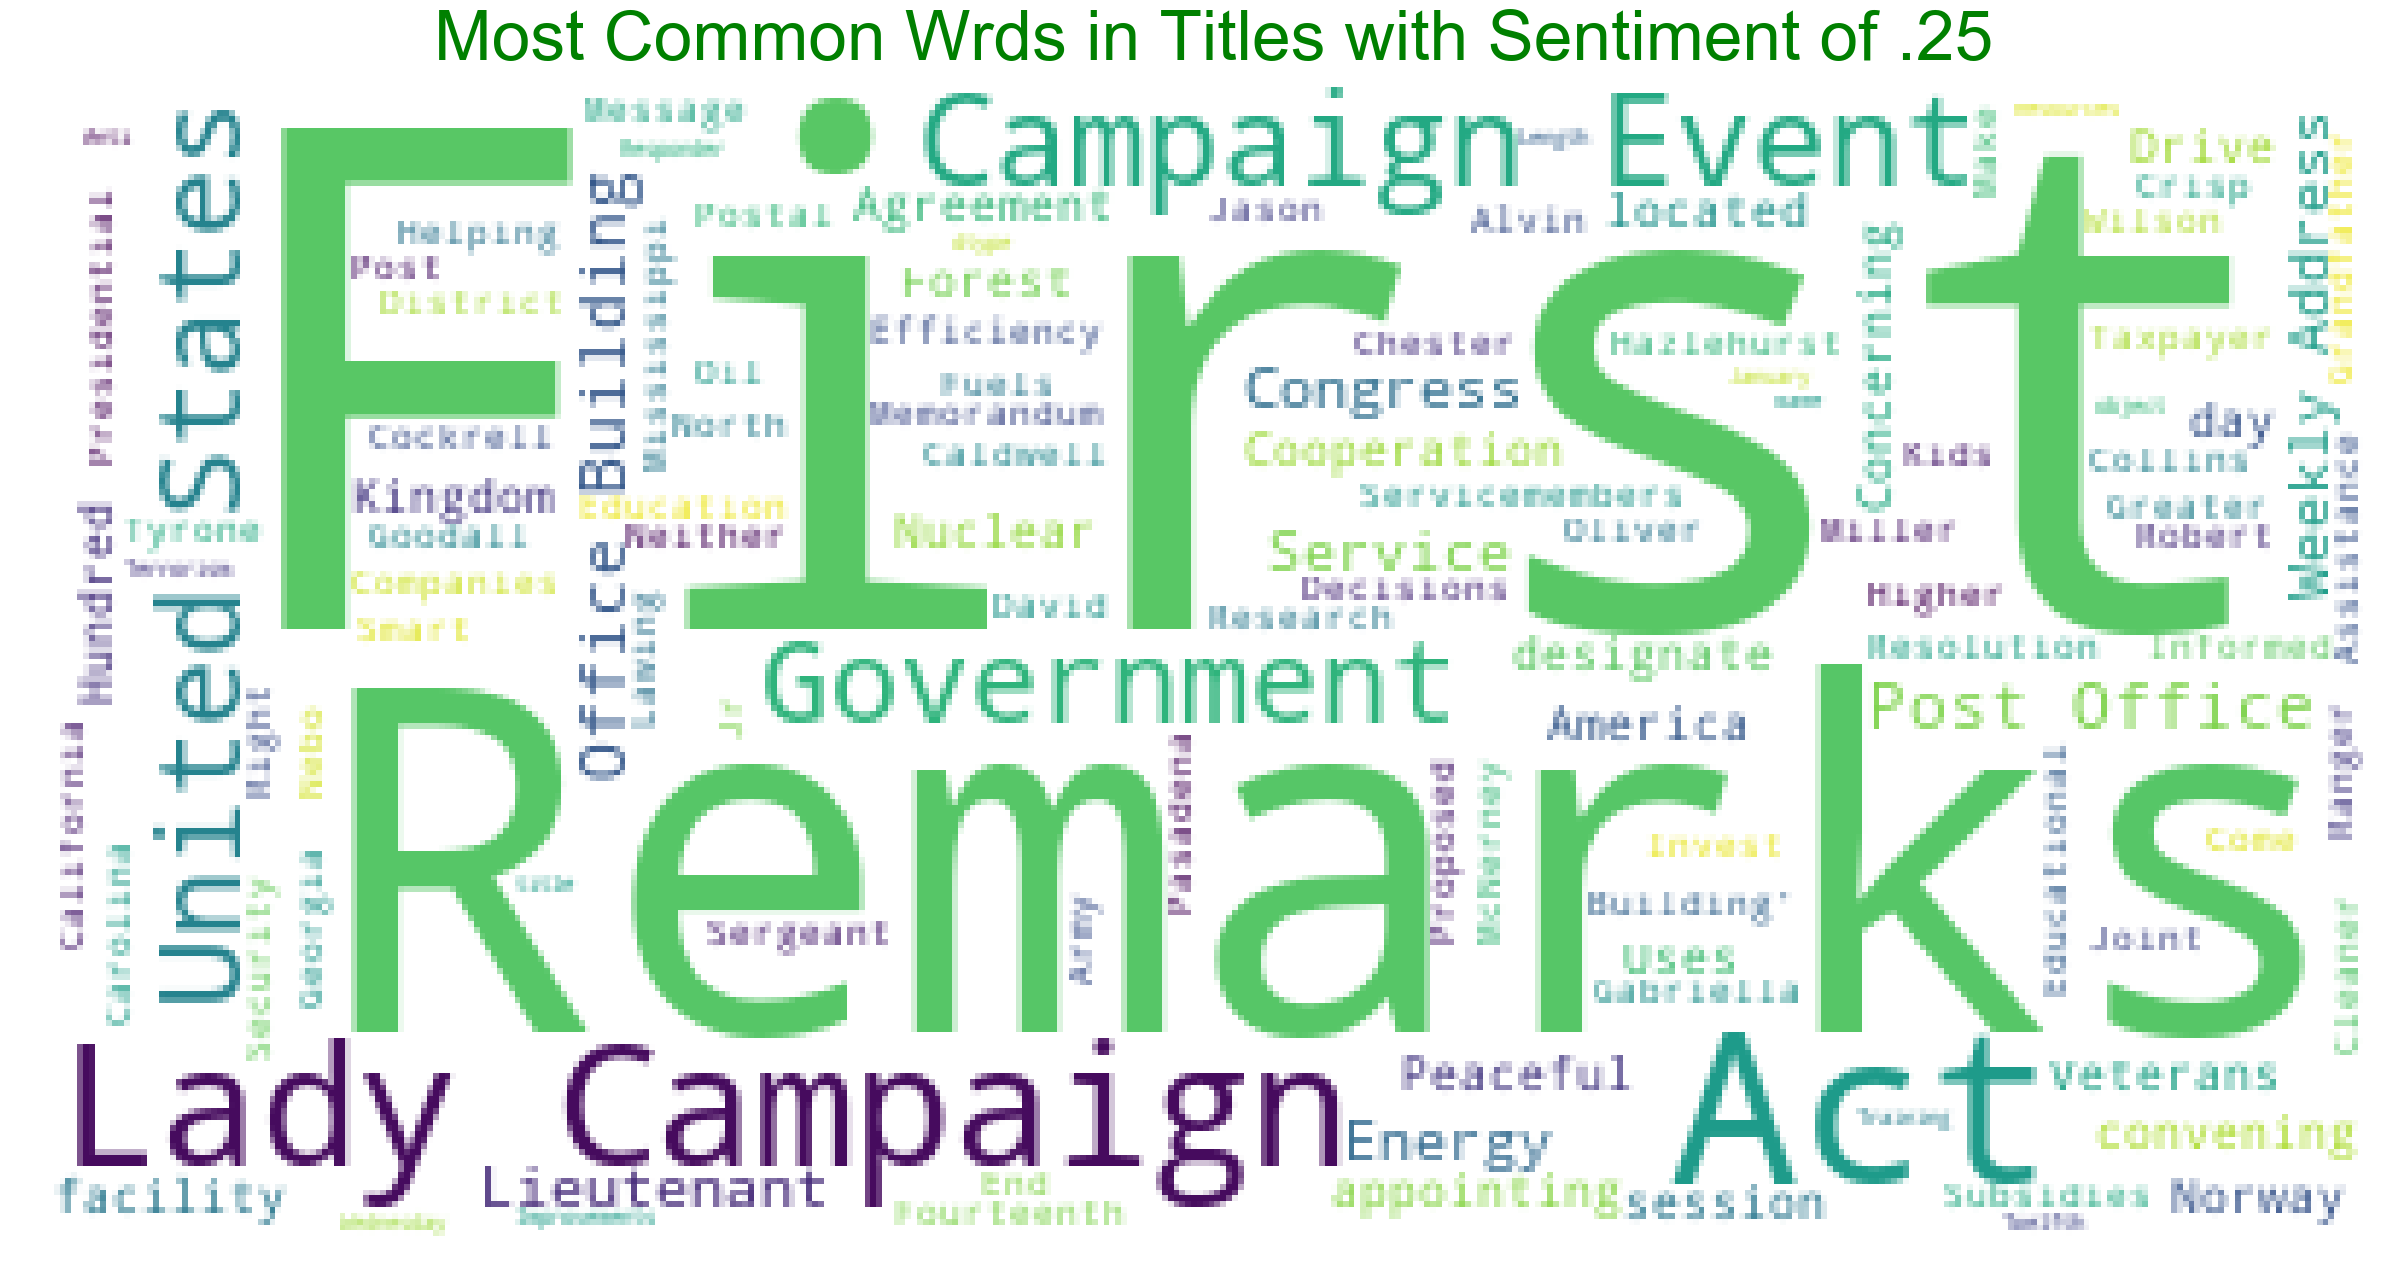

In [113]:
comments_text = str(Slighty_Postive_Sentiment.title)
#comments_mask = np.array(Image.open(d + 'comment.png'))
plot_wordcloud(comments_text,  max_words=400, max_font_size=120, 
               title = 'Most Common Wrds in Titles with Sentiment of .25', title_size=50)

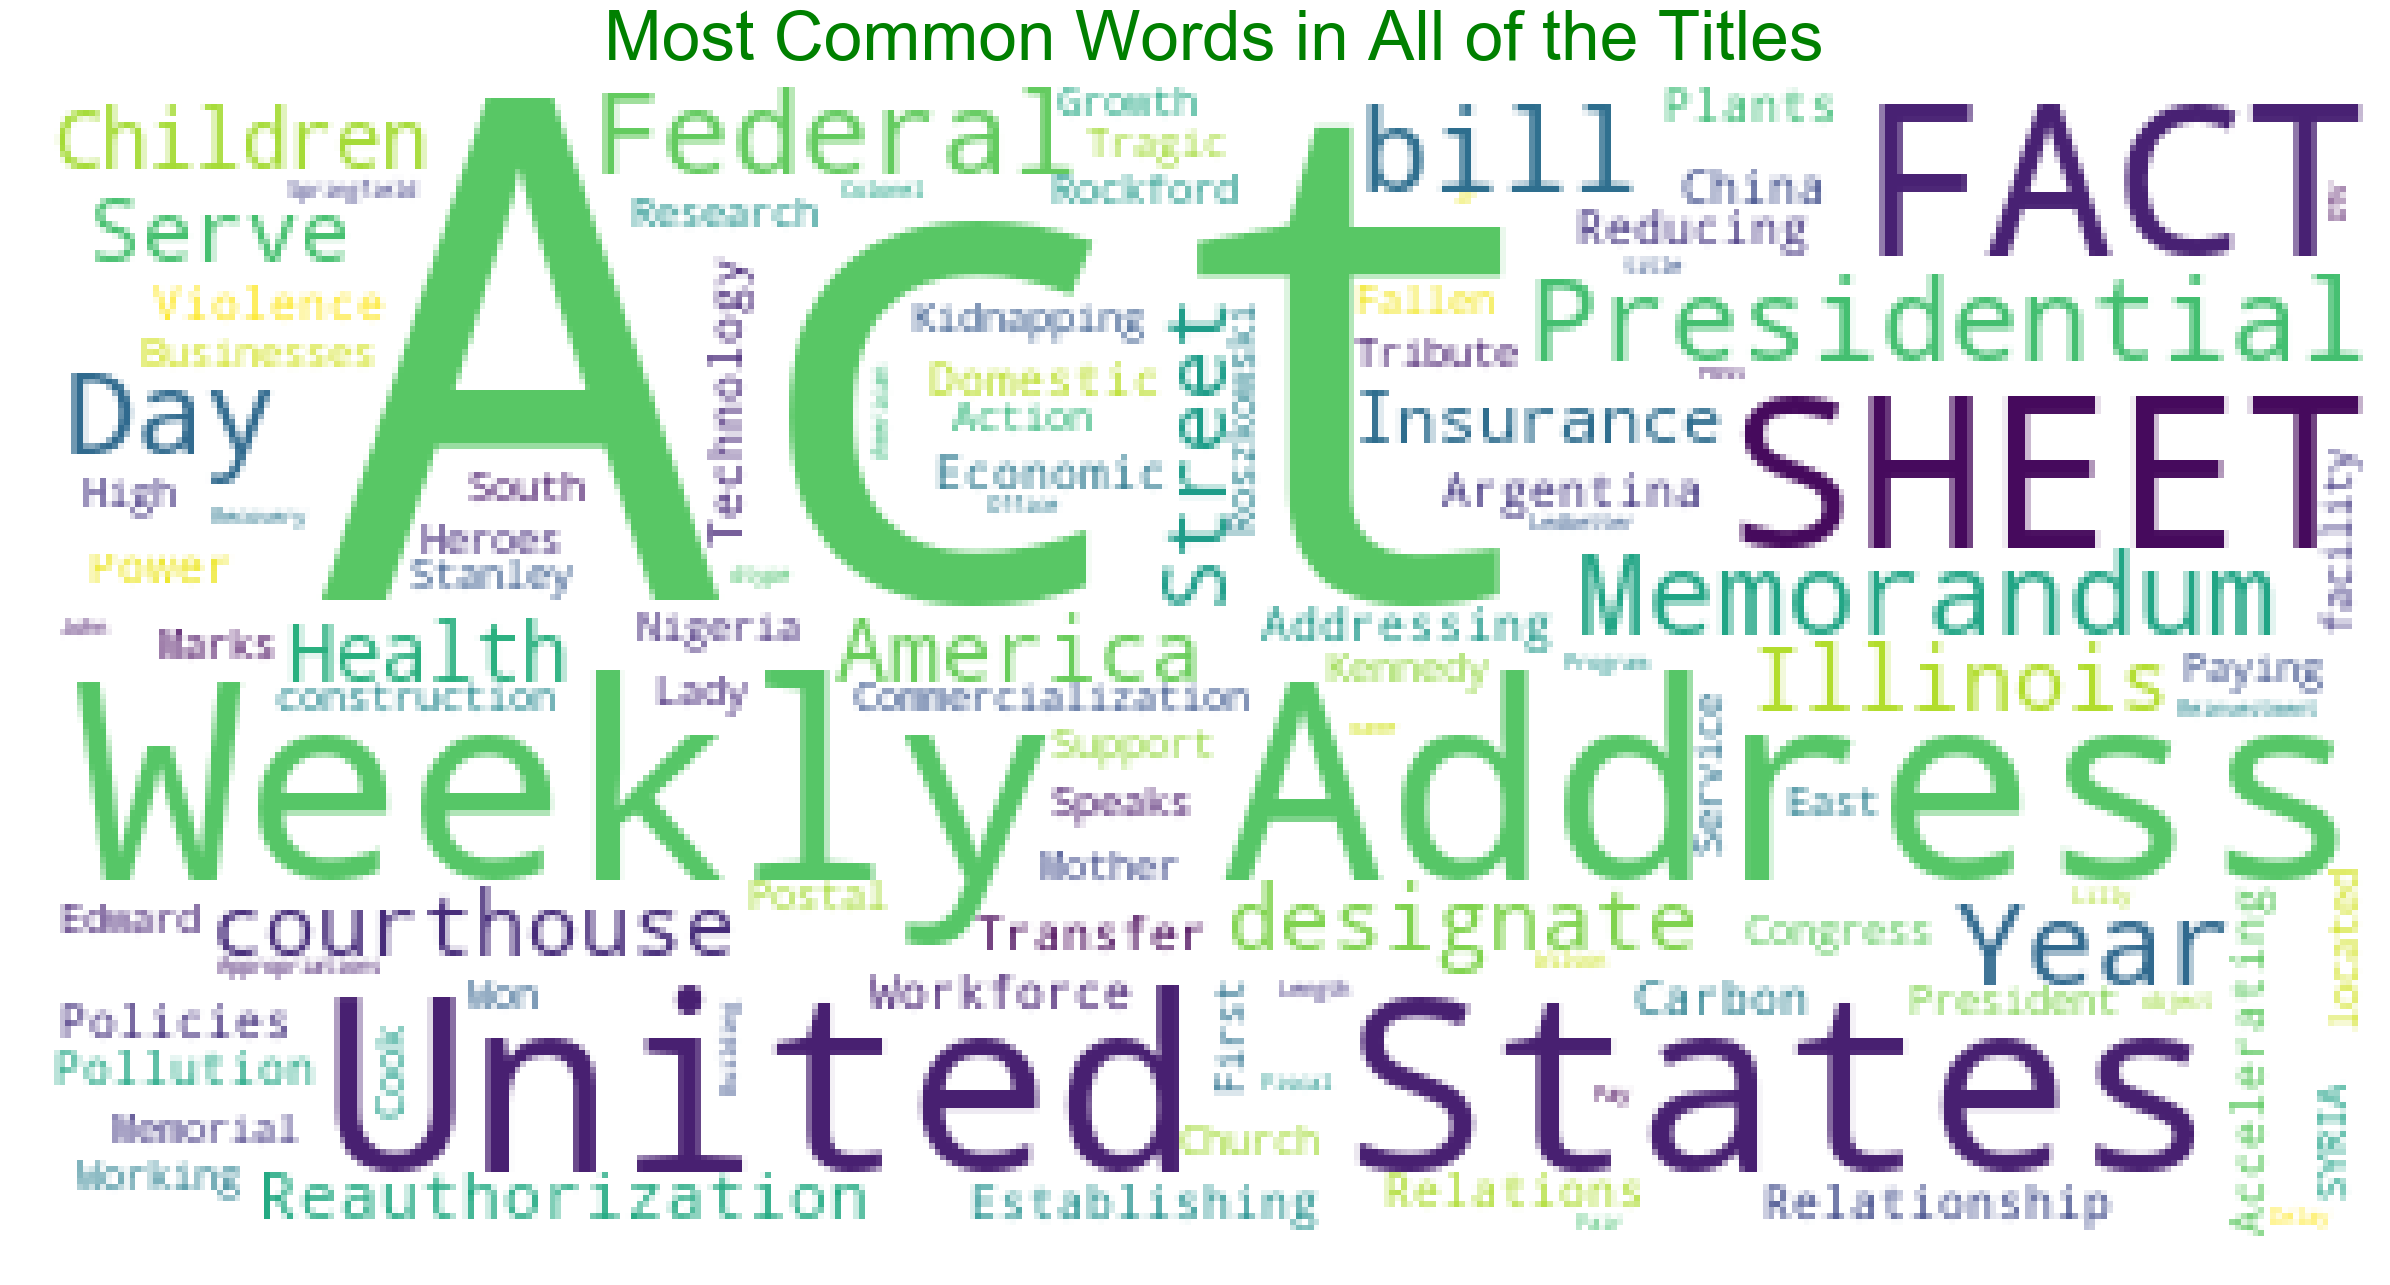

In [114]:
comments_text = str(df.title)
plot_wordcloud(comments_text,  max_words=400, max_font_size=120, 
               title = 'Most Common Words in All of the Titles', title_size=50)

In [115]:
Positive_Sentiment = df[df['title_sentiment'] >= .5]
Negative_Sentiment = df[df['title_sentiment'] <= -.5]

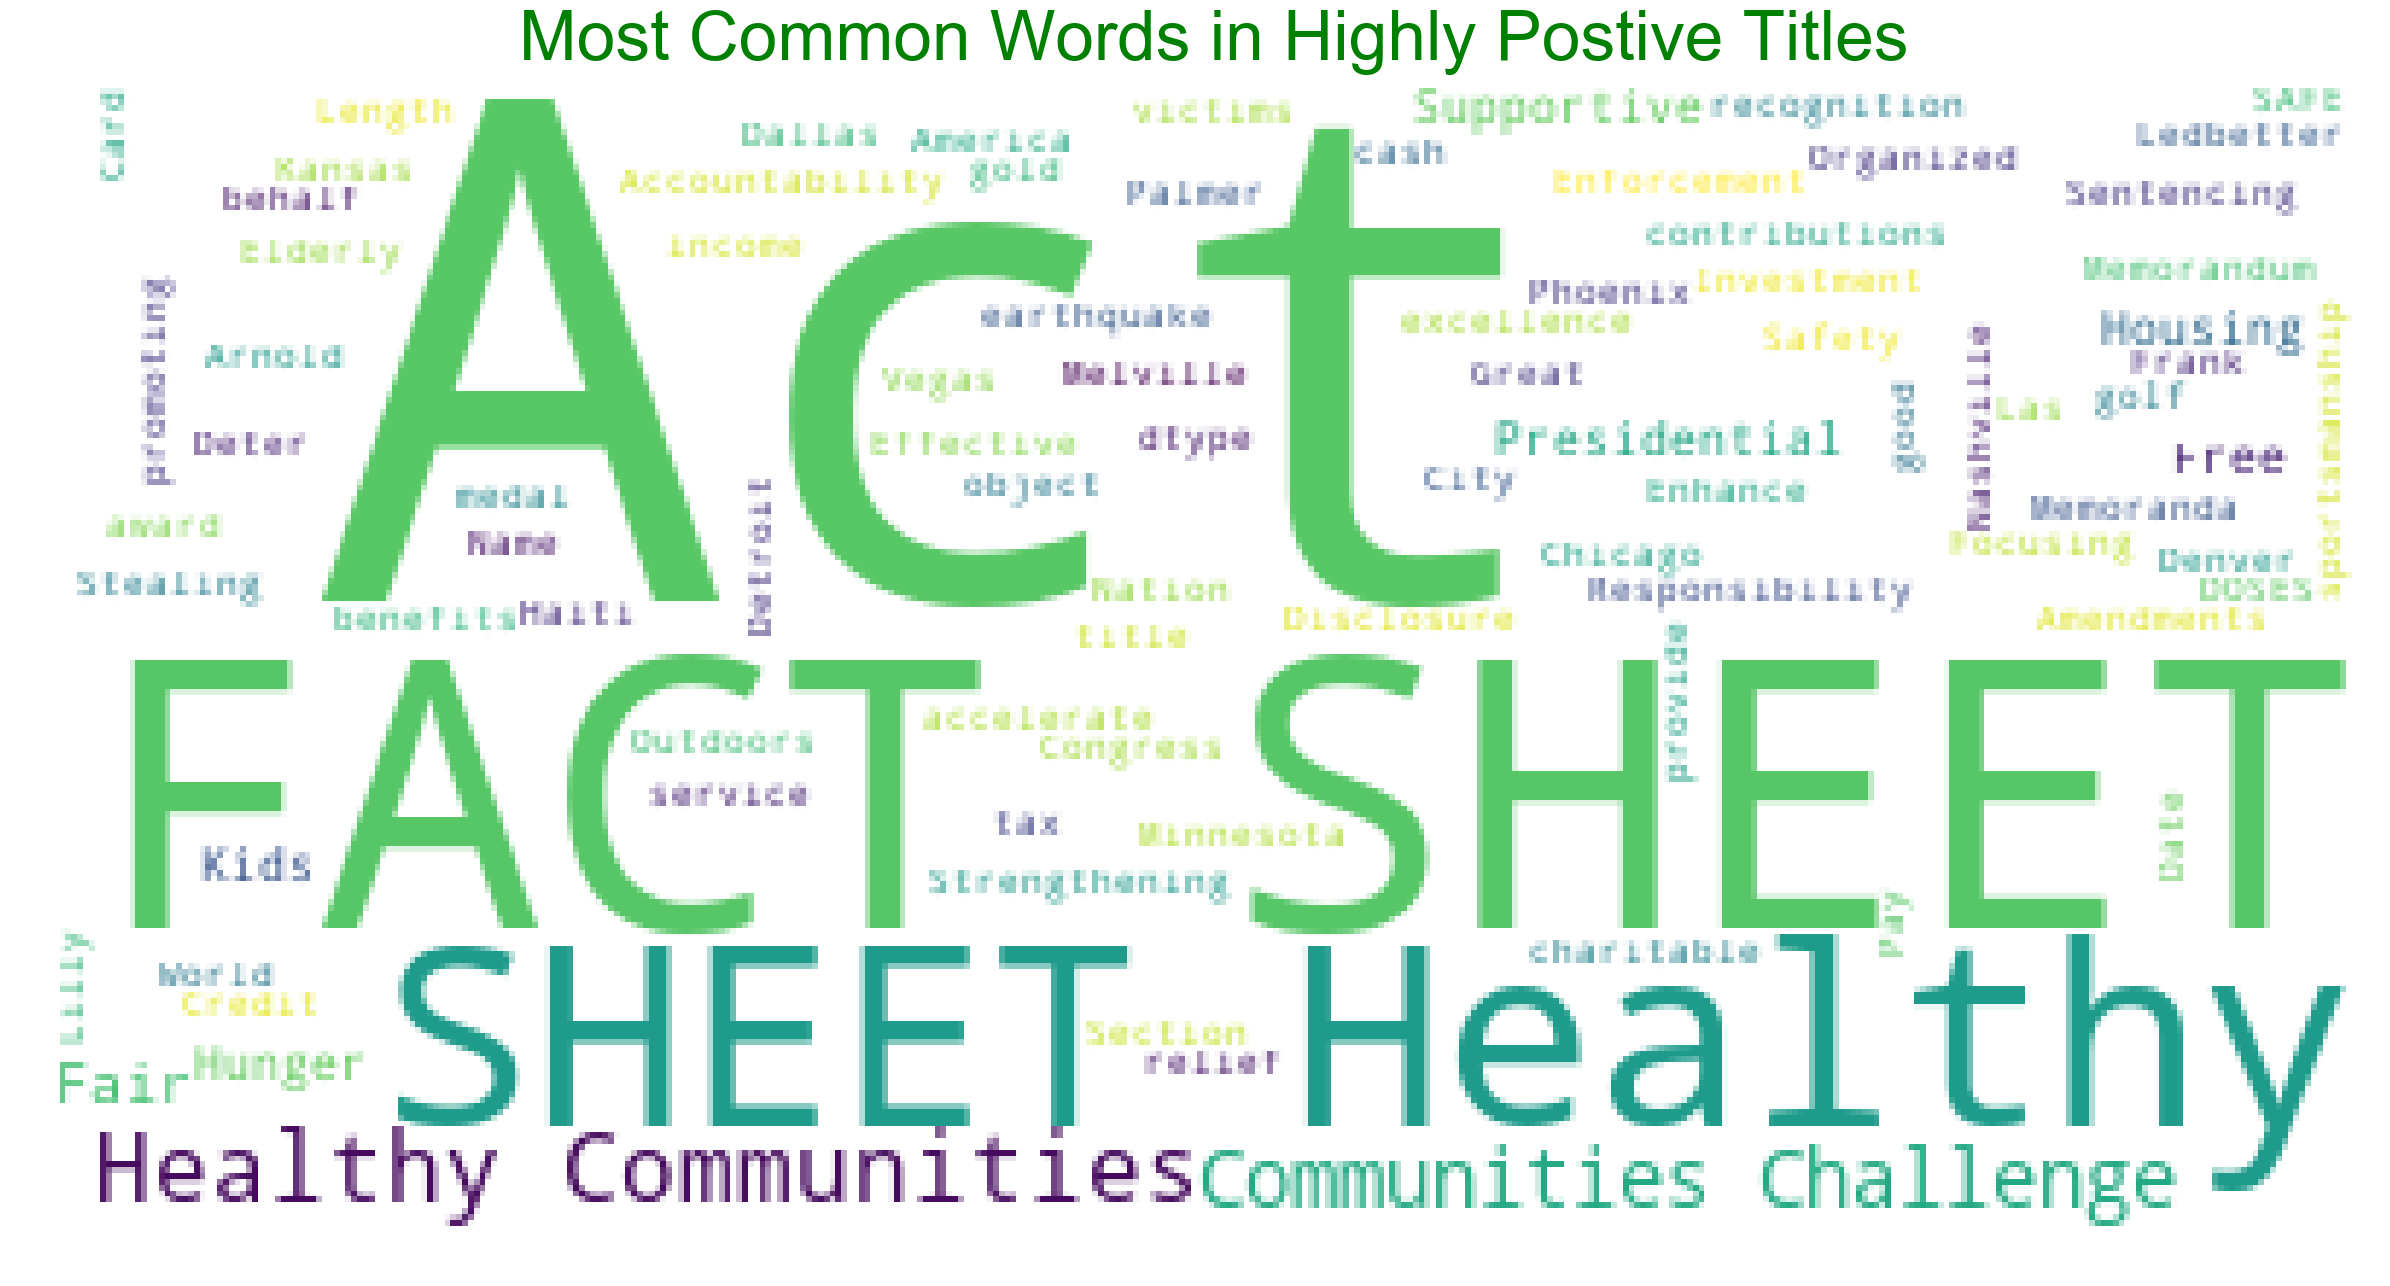

In [116]:
comments_text = str(Positive_Sentiment.title)
plot_wordcloud(comments_text,  max_words=400, max_font_size=120, 
               title = 'Most Common Words in Highly Postive Titles', title_size=50)

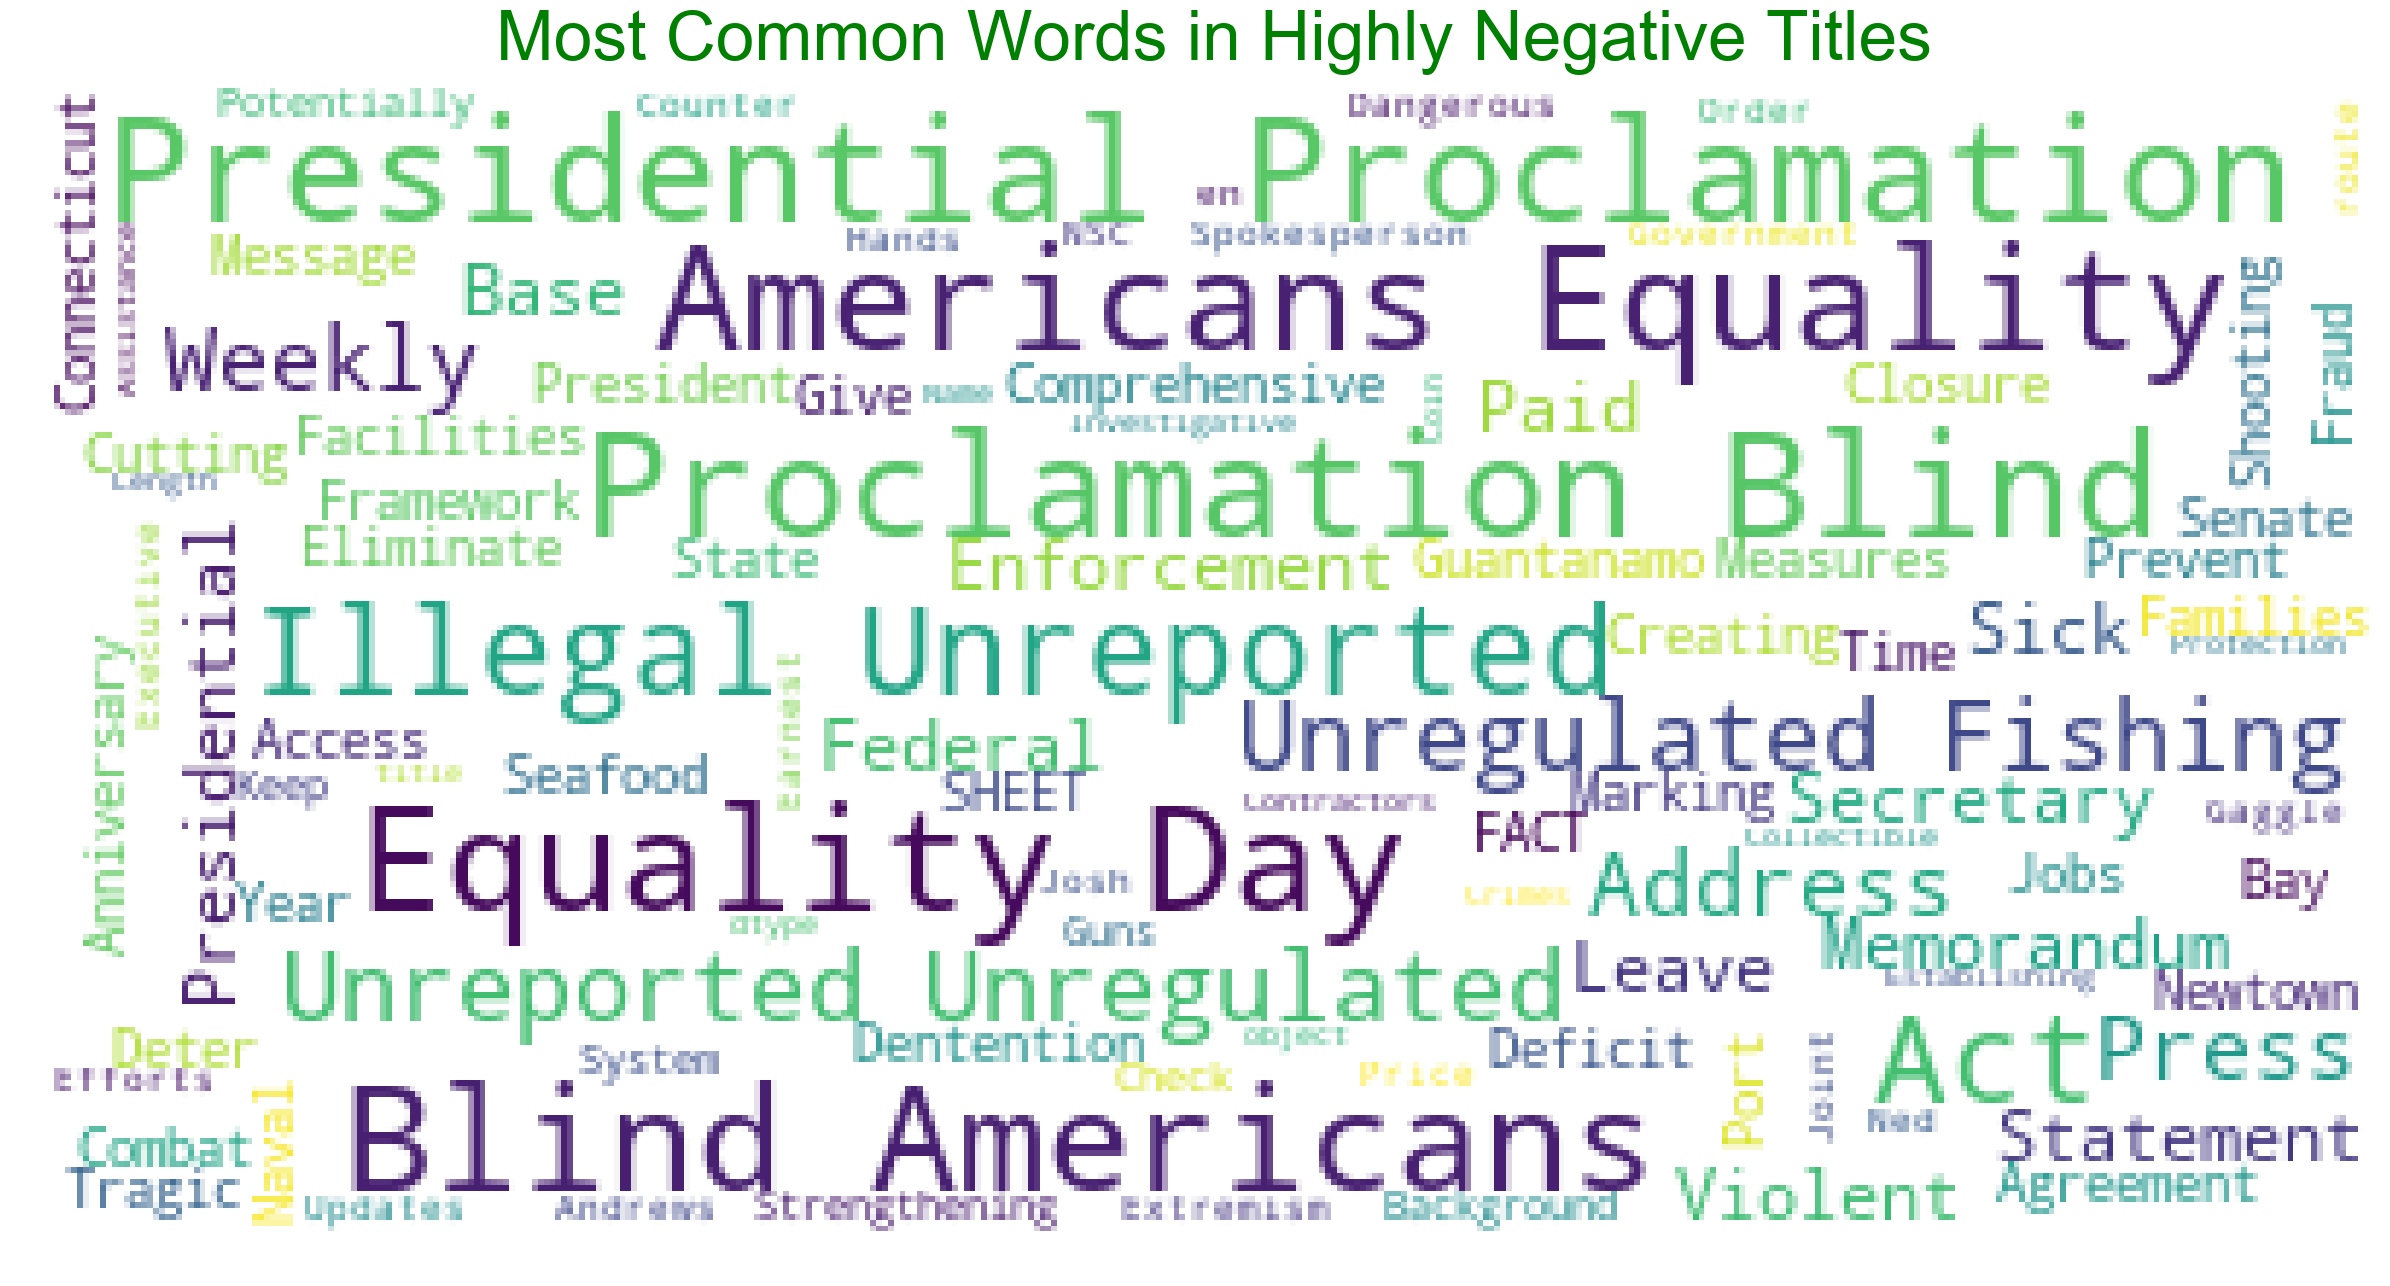

In [117]:
comments_text = str(Negative_Sentiment.title)
plot_wordcloud(comments_text,  max_words=400, max_font_size=120, 
               title = 'Most Common Words in Highly Negative Titles', title_size=50)

In [118]:
df.pivot_table(values='title_sentiment', aggfunc='mean', index='document_type_name')

,title_sentiment
document_type_name,
Executive Orders,0.046746
Presidential Memoranda,0.021808
Press Briefings,-0.006791
Proclamations,0.008193
Signed Legislation,0.019537
Speeches and Remarks,0.047658
Statements and Releases,0.034881
Vetoed Legislation,-0.005682
Your Weekly Address,0.055925


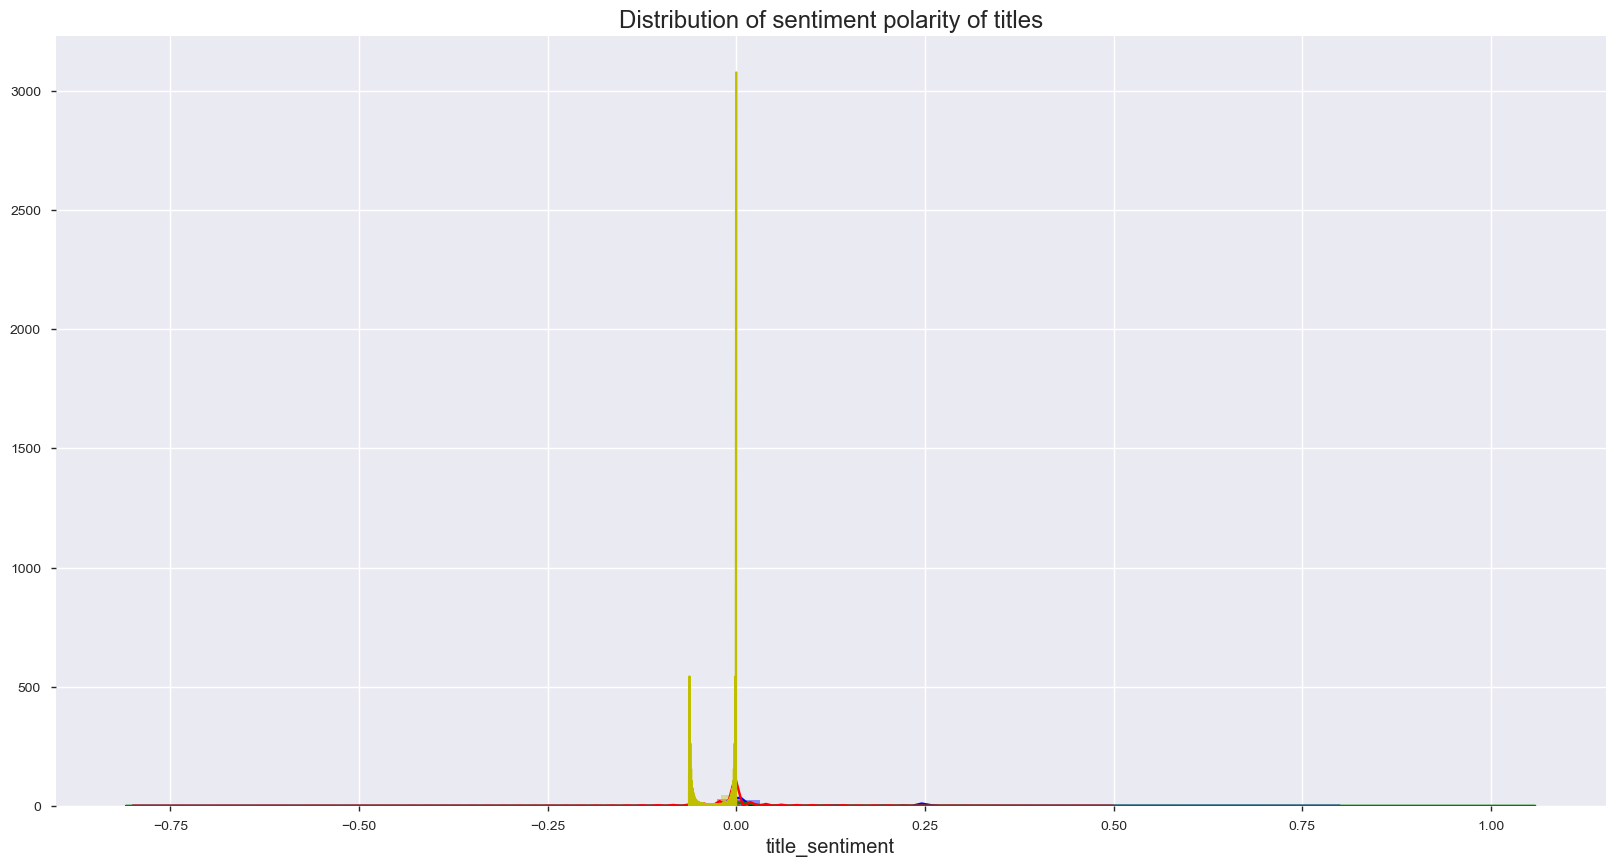

In [119]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['axes.labelsize'] = 'x-large'
fig, ax = plt.subplots()
sns.distplot(df[df['document_type_name'] == 'Speeches and Remarks'].title_sentiment, 
             color='b',  ax=ax, label = "Speeches and Remarks")
sns.distplot(df[df['document_type_name'] == 'Your Weekly Address'].title_sentiment, 
             color='g',  ax=ax, label = "Weekly Adress")
sns.distplot(df[df['document_type_name'] == 'Press Briefings'].title_sentiment, 
             color='r',  ax=ax, label = "Press Briefings")
sns.distplot(df[df['document_type_name'] == 'Vetoed Legislation'].title_sentiment, 
             color='y',  ax=ax, label = "Vetoed Legislation")
plt.title("Distribution of sentiment polarity of titles");

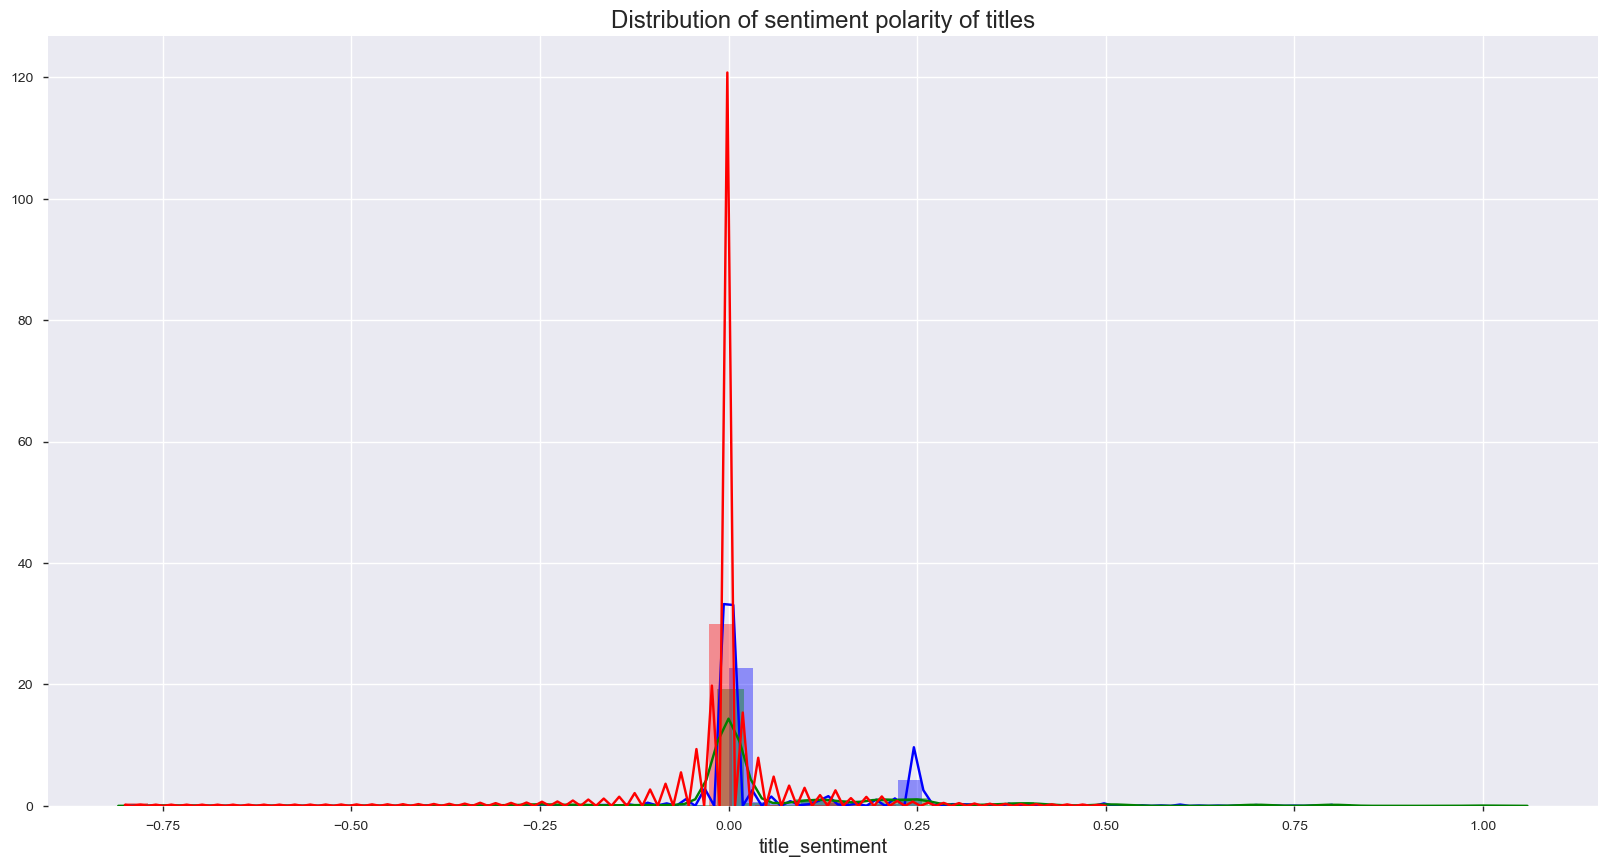

In [120]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['axes.labelsize'] = 'x-large'
fig, ax = plt.subplots()
sns.distplot(df[df['document_type_name'] == 'Speeches and Remarks'].title_sentiment, 
             color='b',  ax=ax, label = "Speeches and Remarks")
sns.distplot(df[df['document_type_name'] == 'Your Weekly Address'].title_sentiment, 
             color='g',  ax=ax, label = "Weekly Adress")
sns.distplot(df[df['document_type_name'] == 'Press Briefings'].title_sentiment, 
             color='r',  ax=ax, label = "Press Briefings")
plt.title("Distribution of sentiment polarity of titles");

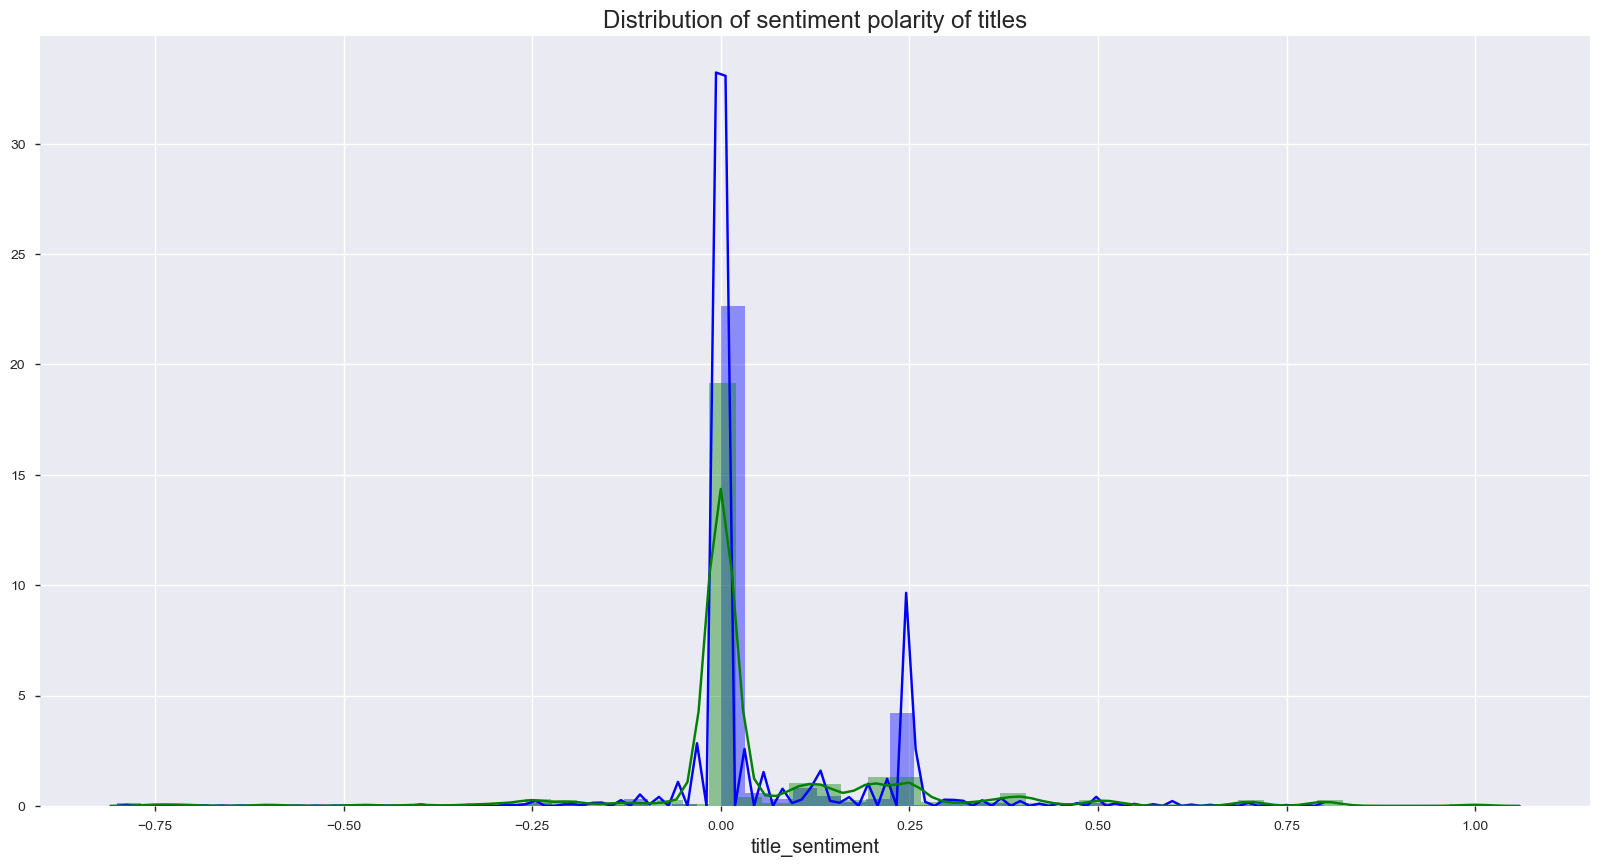

In [121]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['axes.labelsize'] = 'x-large'
fig, ax = plt.subplots()
sns.distplot(df[df['document_type_name'] == 'Speeches and Remarks'].title_sentiment, 
             color='b',  ax=ax, label = "Speeches and Remarks")
sns.distplot(df[df['document_type_name'] == 'Your Weekly Address'].title_sentiment, 
             color='g',  ax=ax, label = "Weekly Adress")
plt.title("Distribution of sentiment polarity of titles");

In [122]:
Postive_Sentiment = df[df['title_sentiment'] == .25][['title_sentiment', 
                                                      'document_type_name','title']]
Postive_Sentiment = Postive_Sentiment[Postive_Sentiment['document_type_name'] == 
                                      'Speeches and Remarks']
Postive_Sentiment.head(10)

,title_sentiment,document_type_name,title
41,0.25,Speeches and Remarks,Remarks by the First Lady at a Campaign Event
43,0.25,Speeches and Remarks,Remarks by the First Lady at a Campaign Event
66,0.25,Speeches and Remarks,Remarks by the First Lady at a Campaign Event
89,0.25,Speeches and Remarks,Remarks by the First Lady at a Campaign Event
111,0.25,Speeches and Remarks,Remarks by the First Lady at a Campaign Event
1248,0.25,Speeches and Remarks,Remarks by the First Lady at a DNC event
1701,0.25,Speeches and Remarks,Remarks by the First Lady to Children on NORAD Santa Tracker Calls
2360,0.25,Speeches and Remarks,Remarks by the First Lady at a Campaign Event
2768,0.25,Speeches and Remarks,Remarks by the First Lady and Ryan Seacrest at Children’s National Health System
2950,0.25,Speeches and Remarks,Remarks by the First Lady


In [123]:
titles_by_day = df.pivot_table(index='document_date', aggfunc='count', values='title')
titles_by_day = titles_by_day.reset_index()
titles_by_day = titles_by_day.sort_values(['title'],ascending=False)
titles_by_day.head(5)

,document_date,title
2737,2016-12-16 00:00:00,66
2042,2014-12-18 00:00:00,61
2040,2014-12-16 00:00:00,45
911,2011-09-08 00:00:00,44
650,2010-12-08 00:00:00,40


In [124]:
df['month_year'] = pd.to_datetime(df.document_date).dt.to_period('m')

In [125]:
titles_by_month = df.pivot_table(index='month_year', 
                                  aggfunc='count', values='title_sentiment')
titles_by_month = titles_by_month.reset_index()

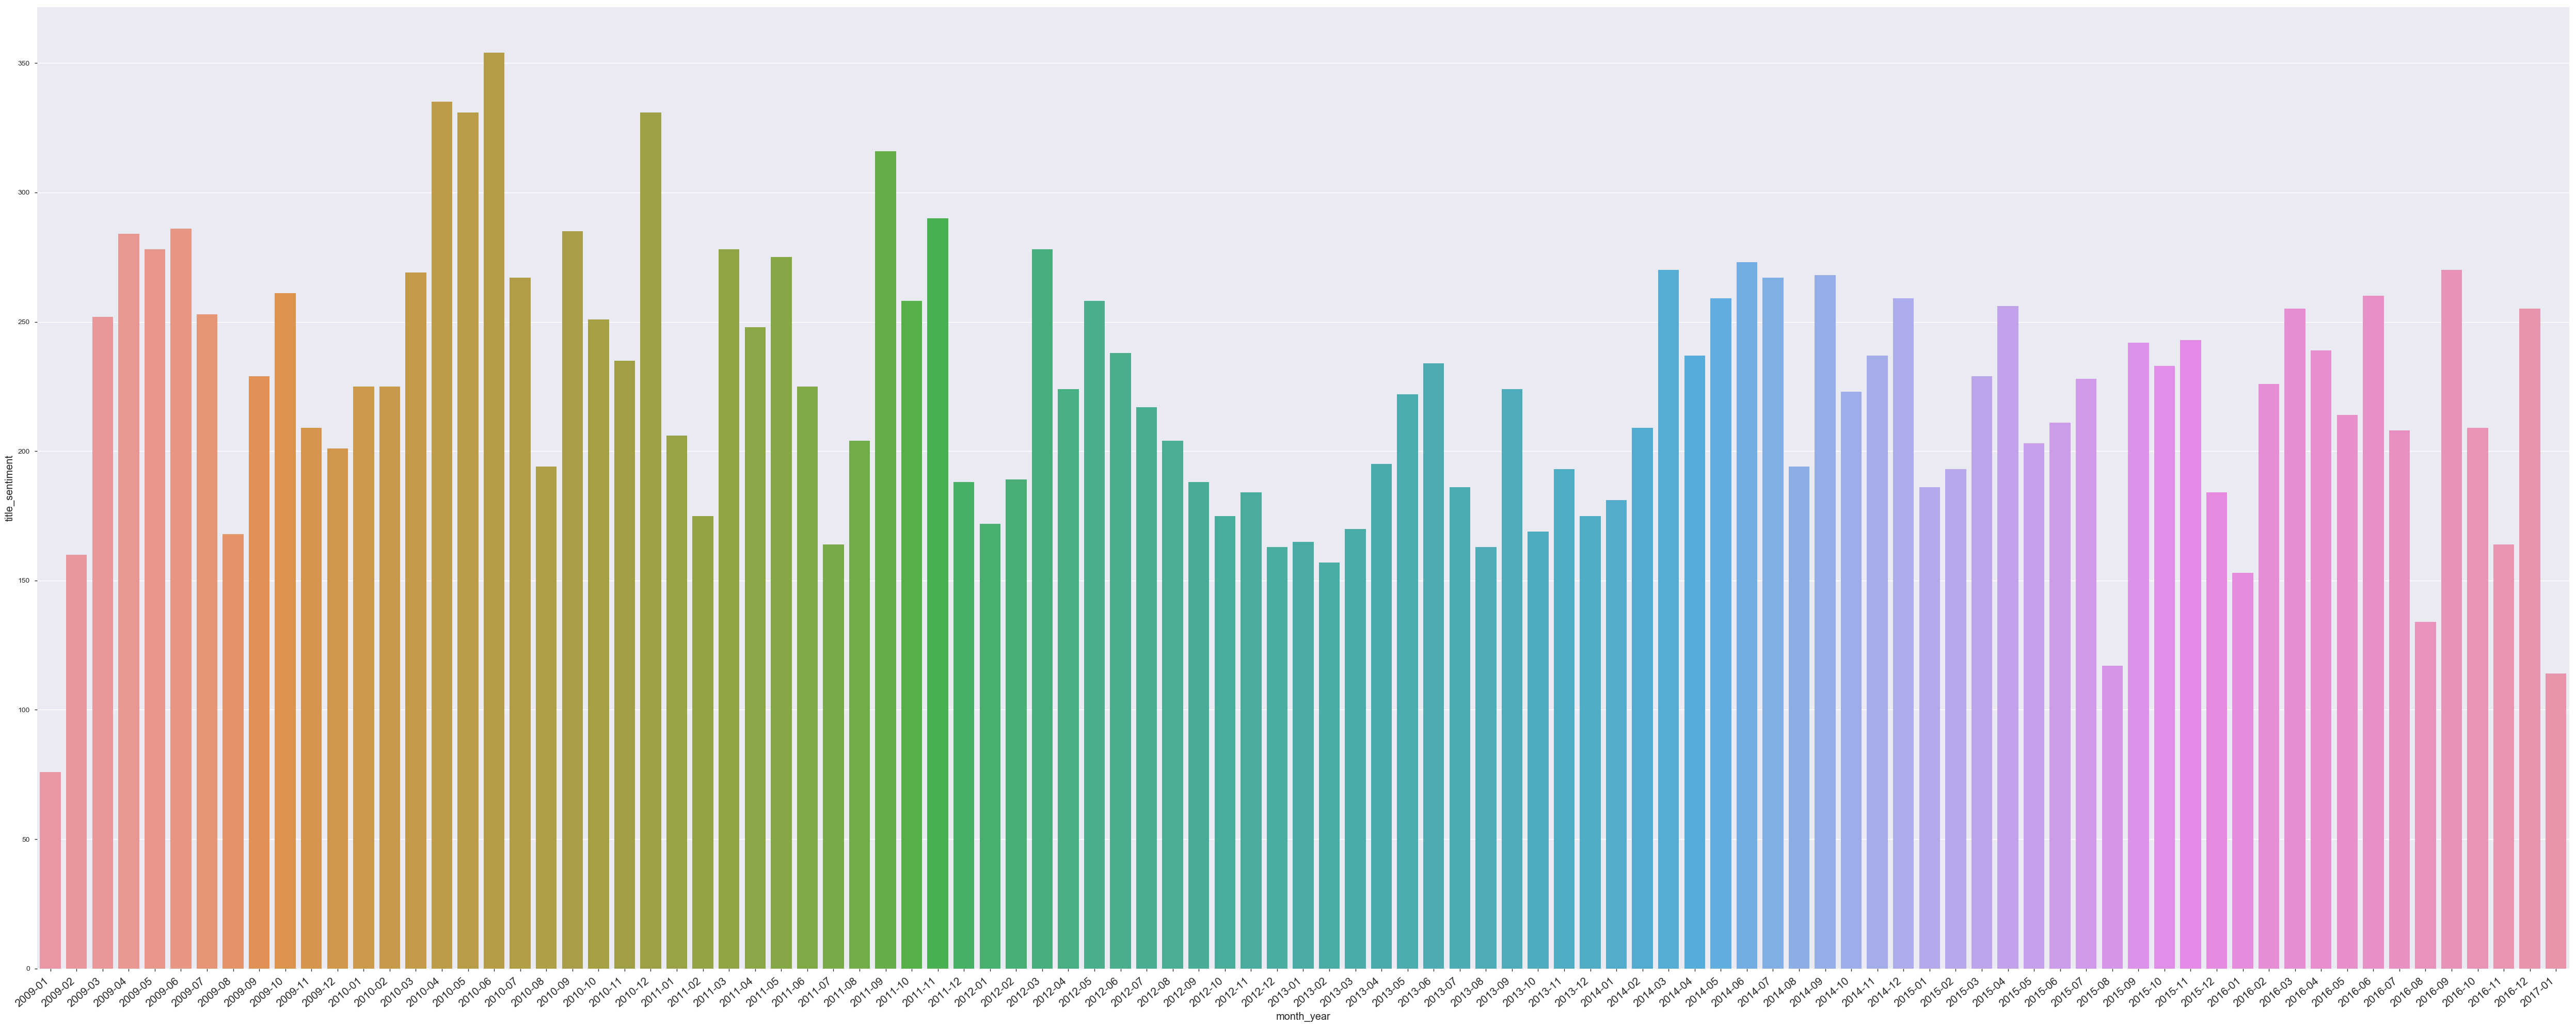

In [126]:
plt.rcParams['figure.figsize'] = (50, 20)
ax = sns.barplot(x='month_year', y='title_sentiment', data=titles_by_month)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=15)
plt.rcParams["xtick.labelsize"] = 17
plt.tight_layout()
plt.show()

In [127]:
sentiment_by_month = df.pivot_table(index='month_year', 
                                  aggfunc='mean', values='title_sentiment')
sentiment_by_month = df.pivot_table(index='month_year', 
                                  aggfunc='mean', values='title_sentiment')
sentiment_by_month = sentiment_by_month.reset_index()

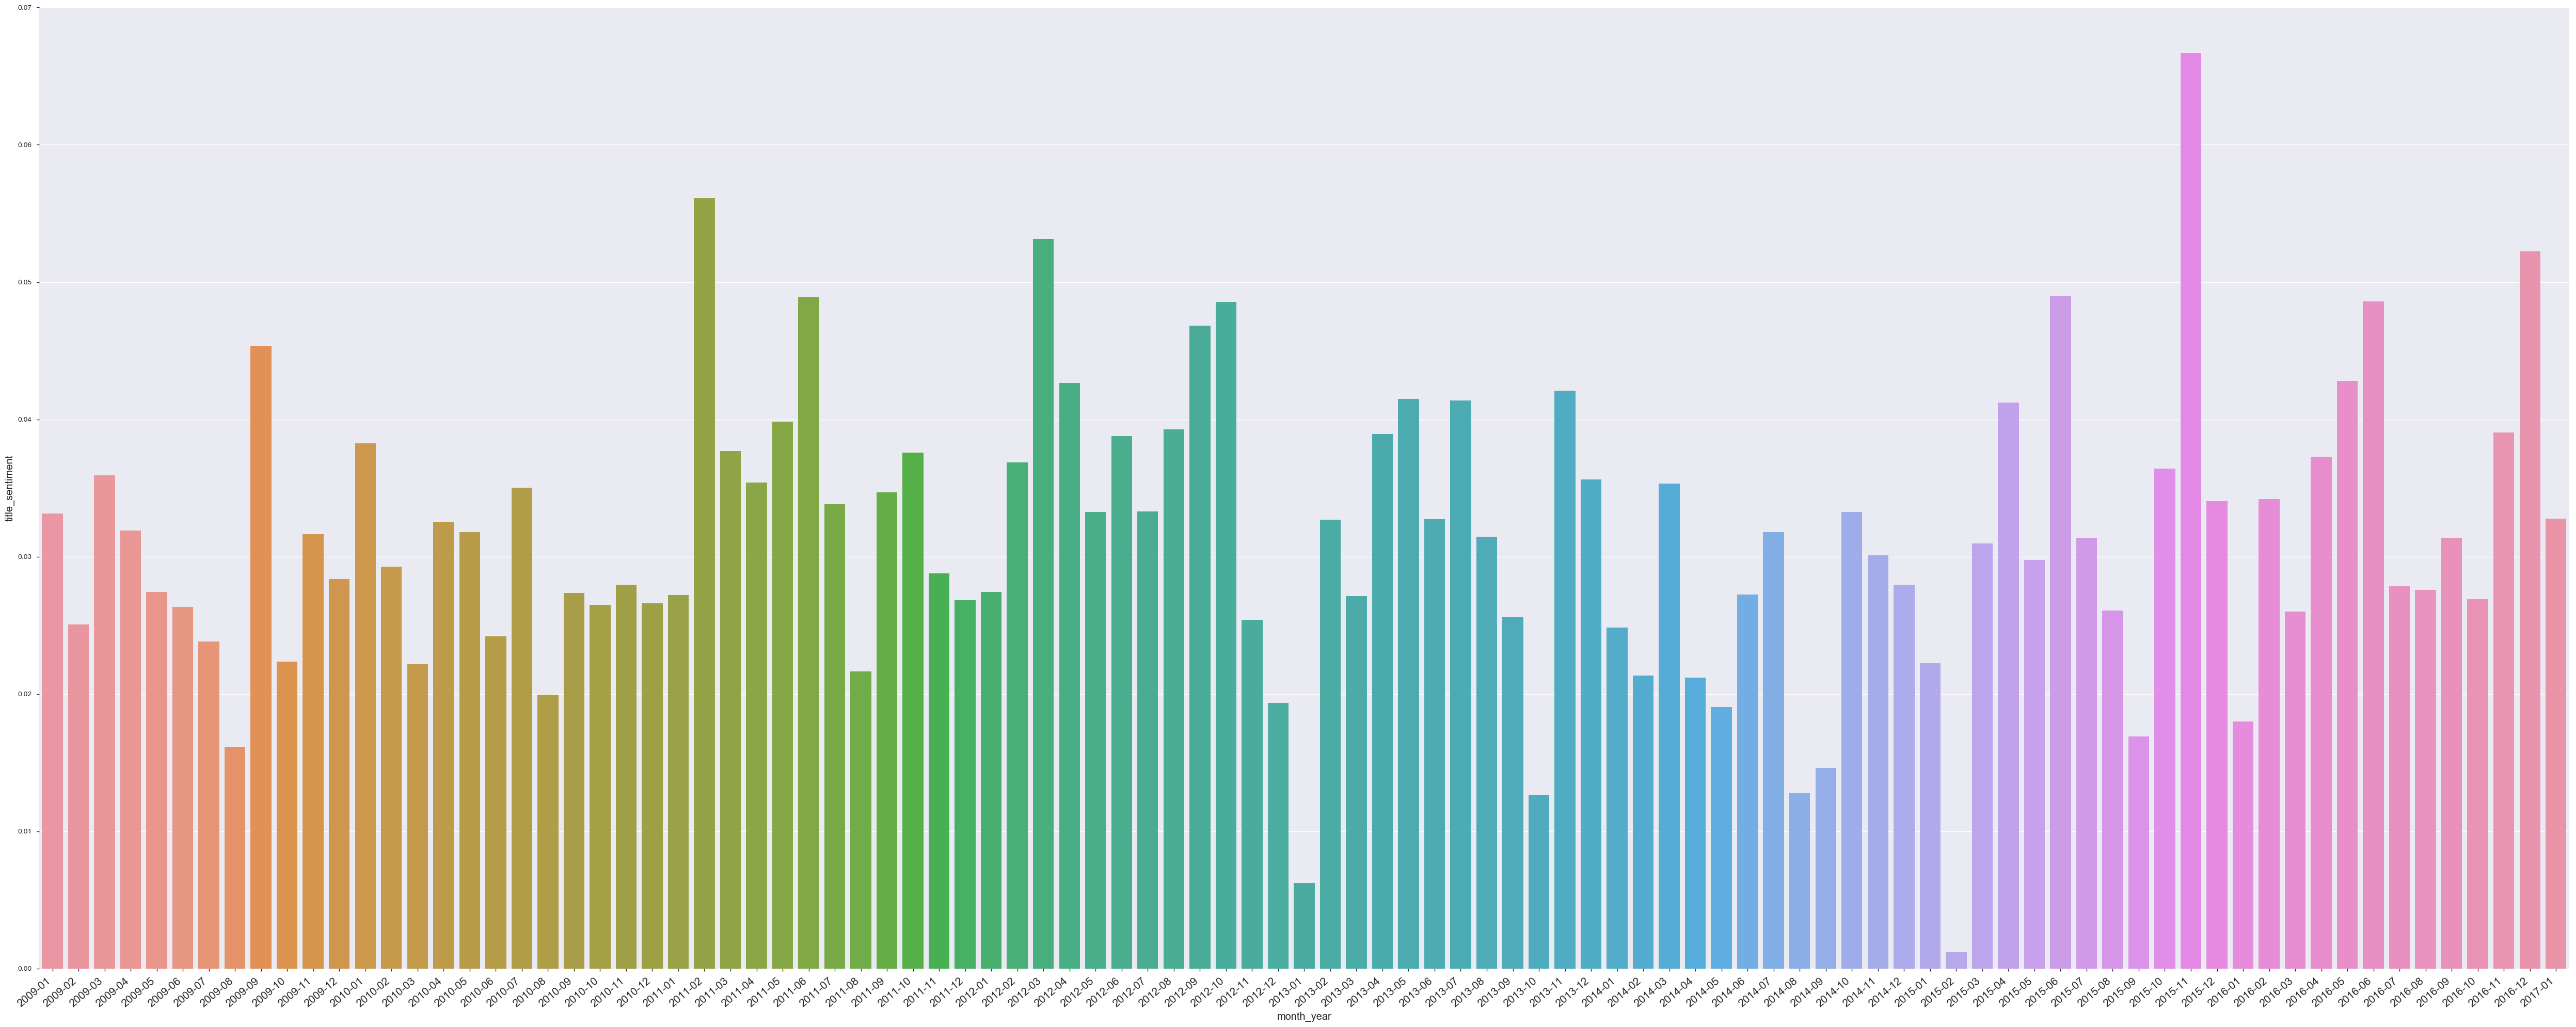

In [128]:
plt.rcParams['figure.figsize'] = (50, 20)
ax = sns.barplot(x='month_year', y='title_sentiment', data=sentiment_by_month)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=15)
plt.rcParams["xtick.labelsize"] = 17
plt.tight_layout()
plt.show()

In [129]:
sentiment_by_month = sentiment_by_month.sort_values('title_sentiment',ascending=False)
sentiment_by_month.head()

,month_year,title_sentiment
82,2015-11,0.066653
25,2011-02,0.056110
38,2012-03,0.053140
95,2016-12,0.052234
77,2015-06,0.048974


In [130]:
sentiment_by_month = sentiment_by_month.sort_values('title_sentiment')
sentiment_by_month.head()

,month_year,title_sentiment
73,2015-02,0.001188
48,2013-01,0.006227
57,2013-10,0.012668
67,2014-08,0.012753
68,2014-09,0.014614


In [131]:
df['month_year'] = df['month_year'].apply(lambda x: str(x))
high_sentiment = df[df['month_year']=='2015-11'][['title_sentiment','title']]
high_sentiment = high_sentiment.sort_values(by='title_sentiment', ascending=False)
high_sentiment.head(25)

,title_sentiment,title
2644,0.700000,President Obama Nominates Two to Serve on the Superior Court of the District of Columbia
2730,0.650000,FACT SHEET: Healthy Communities Challenge for Great Falls
2754,0.500000,FACT SHEET: Healthy Communities Challenge for Richmond
2755,0.500000,FACT SHEET: Healthy Communities Challenge for Oakland
2756,0.500000,FACT SHEET: Healthy Communities Challenge for Seattle
2745,0.500000,Vice President Joe Biden Op-Ed: It's On Us to Stop Campus Sexual Assault
2731,0.500000,FACT SHEET: Healthy Communities Challenge for Tampa
33,0.500000,FACT SHEET: Healthy Communities Challenge for Denver
2741,0.500000,FACT SHEET: Healthy Communities Challenge for Salt Lake City
2740,0.500000,FACT SHEET: Healthy Communities Challenge for Charlotte


In [132]:
df['month_year'] = df['month_year'].apply(lambda x: str(x))
low_sentiment = df[df['month_year']=='2015-02'][['title_sentiment','title']]
low_sentiment = low_sentiment.sort_values(by='title_sentiment', ascending=False)
low_sentiment.tail(10)

,title_sentiment,title
3832,-0.125000,Statement by NSC Spokesperson Bernadette Meehan on National Security Advisor Susan E. Rice’s Meeting with Egyptian Foreign Minister Sameh Shoukry
3833,-0.125000,Statement by NSC Spokesperson Bernadette Meehan on National Security Advisor Susan E. Rice’s Meeting with Danish Foreign Minister Martin Lidegaard
3876,-0.166667,Readout of the President’s Meeting with the Congressional Black Caucus
13938,-0.166667,Remarks by the President at Black History Month Reception
955,-0.291667,Weekly Address: Everyone Who Works Hard Should Get Ahead
3838,-0.400000,FACT SHEET: The White House Summit on Countering Violent Extremism
13212,-0.400000,Remarks by National Security Advisor Susan E. Rice at the White House Summit on Countering Violent Extremism
3847,-0.400000,Background Conference Call by Senior Administration Officials Previewing the White House Summit on Countering Violent Extremism
13950,-0.800000,"Remarks by the President at the Summit on Countering Violent Extremism | February 19, 2015"
13951,-0.800000,Remarks by the President in Closing of the Summit on Countering Violent Extremism


Steps Forward